## Instacart Market Basket Analysis ##
### EDA: Part 2  ###

I leveraged Y_data profiling for a quick overview of the dataset.  You can find the results [here.](https://github.com/lmgaines30/Instacart_Customer_Basket_Analysis/blob/main/notebooks/02_Instacart_EDA.ipynb) 

In [17]:
#import packages
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set_theme()
import os

import warnings
warnings.filterwarnings("ignore")

In [18]:
#import final combo_order_product tables (no prod, aisle, dept names)
combo_order_prod_train_df = pd.read_csv('../cleaned_data_files/combo_order_prod_train.csv')
combo_order_prod_prior_df = pd.read_csv('../cleaned_data_files/combo_order_prod_prior.csv')

#import final product table
combo_prod_df = pd.read_csv('../cleaned_data_files/combo_prod.csv')

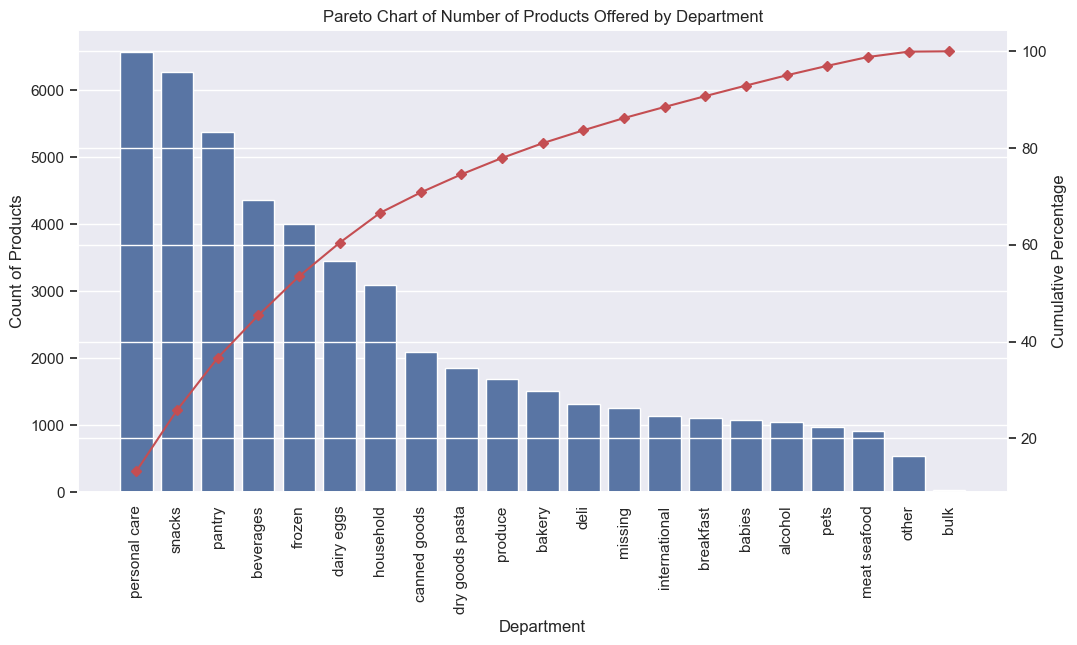

In [19]:
#create a pareto chart of the number of products per department
#count the number of departments and sort the values
count = combo_prod_df['department'].value_counts().sort_values(ascending=False)
#calculate the cumulative %s of the products in each department
cumulative_percent = count.cumsum() / count.sum() * 100

# Create a combined bar and line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=count.index, y=count, ax=ax1)
ax1.set_ylabel('Count of Products')
ax1.set_xlabel('Department')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Create a second y-axis for the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(count.index, cumulative_percent, color='r', marker='D', ms=5)
ax2.set_ylabel('Cumulative Percentage')

plt.title('Pareto Chart of Number of Products Offered by Department')
plt.show()

The above pareto chart shows the number of producsts available for purchase in the instacart catalogue.  It would be interesting to review the orders to see if there is alignment between the products available for sale, and which product departments produce the highest number of sales.

In [20]:
combo_order_prod_train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   product_id              1384617 non-null  int64  
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   user_id                 1384617 non-null  int64  
 5   eval_set                1384617 non-null  object 
 6   order_number            1384617 non-null  int64  
 7   order_dow               1384617 non-null  int64  
 8   order_hour_of_day       1384617 non-null  int64  
 9   days_since_prior_order  1384617 non-null  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 105.6+ MB


In [21]:
combo_order_prod_train_df.describe().round(2)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,1384617.00,1384617.00,1384617.00,1384617.00,1384617.00,1384617.00,1384617.00,1384617.00,1384617.00
mean,1706297.62,25556.24,8.76,0.60,103112.78,17.09,2.70,13.58,17.07
std,989732.65,14121.27,7.42,0.49,59487.15,16.61,2.17,4.24,10.43
min,1.00,1.00,1.00,0.00,1.00,4.00,0.00,0.00,0.00
25%,843370.00,13380.00,3.00,0.00,51732.00,6.00,1.00,10.00,7.00
50%,1701880.00,25298.00,7.00,1.00,102933.00,11.00,3.00,14.00,15.00
75%,2568023.00,37940.00,12.00,1.00,154959.00,21.00,5.00,17.00,30.00
max,3421070.00,49688.00,80.00,1.00,206209.00,100.00,6.00,23.00,30.00


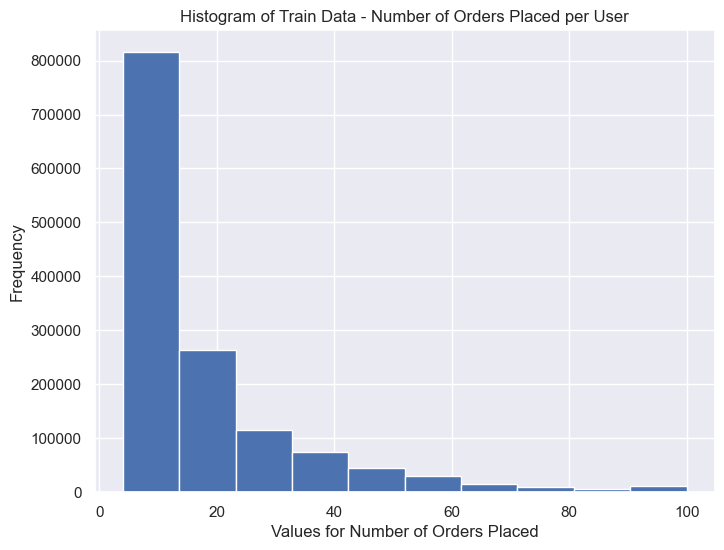

In [22]:
drop_columns = ['order_id', 'product_id', 'user_id', 'eval_set']
df2 = combo_order_prod_train_df.drop(columns=drop_columns)

#create histogram for the number of orders placed per user
fig, axs = plt.subplots(figsize=(8,6))

df2['order_number'].hist( bins=10)
axs.set_title('Histogram of Train Data - Number of Orders Placed per User')
axs.set_xlabel('Values for Number of Orders Placed')
axs.set_ylabel('Frequency')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

#write the image to an SVG file
fig.savefig('../visualizations/train_data_order_number_hist.svg')

In [23]:
combo_order_prod_prior_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   user_id                 int64  
 5   eval_set                object 
 6   order_number            int64  
 7   order_dow               int64  
 8   order_hour_of_day       int64  
 9   days_since_prior_order  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 2.4+ GB


In [24]:
combo_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   department     49688 non-null  object
 5   aisle          49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [25]:
#merge the order and products table to summarize # of orders by product department
orders_all_dimensions_train_df = combo_order_prod_train_df.merge(combo_prod_df, on='product_id')  #train dataset
orders_all_dimensions_prior_df = combo_order_prod_prior_df.merge(combo_prod_df, on='product_id')  #prior dataset

#combine the prior and train dataframes
all_orders_all_dimensions_df = pd.concat([orders_all_dimensions_train_df, orders_all_dimensions_prior_df], axis=0, ignore_index=True)

#export final all_orders_all_dimensions_df
all_orders_all_dimensions_df.to_csv('../cleaned_data_files/orders_prod_all_dimensions2.csv', index=False)
   
all_orders_all_dimensions_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,other creams cheeses
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce,fresh vegetables
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce,fresh vegetables
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,canned meat seafood
5,1,13176,6,0,112108,train,4,4,10,9.0,Bag of Organic Bananas,24,4,produce,fresh fruits
6,1,47209,7,0,112108,train,4,4,10,9.0,Organic Hass Avocado,24,4,produce,fresh fruits
7,1,22035,8,1,112108,train,4,4,10,9.0,Organic Whole String Cheese,21,16,dairy eggs,packaged cheese
8,36,39612,1,0,79431,train,23,6,18,30.0,Grated Pecorino Romano Cheese,2,16,dairy eggs,specialty cheeses
9,36,19660,2,1,79431,train,23,6,18,30.0,Spring Water,115,7,beverages,water seltzer sparkling water


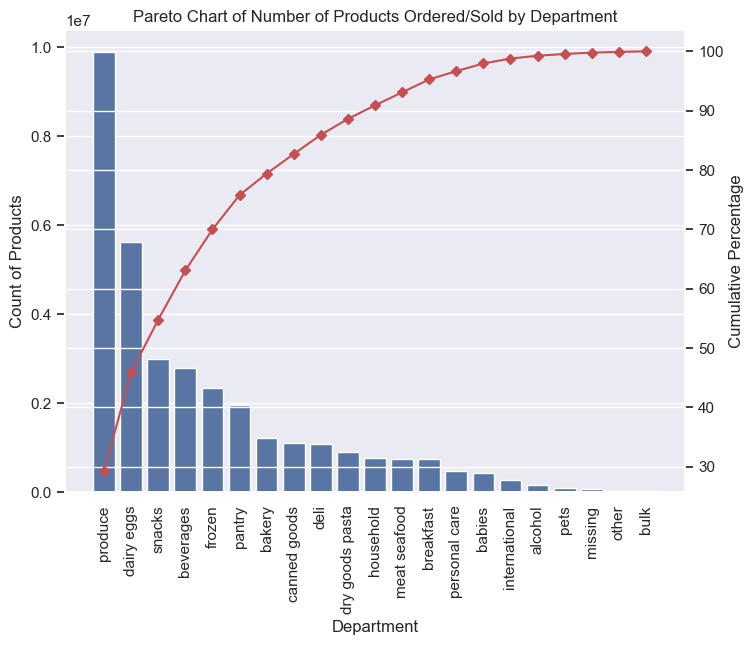

In [26]:
#create a pareto chart of the number of products sold per department
#count the number of departments and sort the values
count_sold = all_orders_all_dimensions_df['department'].value_counts().sort_values(ascending=False)
#calculate the cumulative %s of the products in each department
cumulative_percent_sold = count_sold.cumsum() / count_sold.sum() * 100

# Create a combined bar and line chart
fig2, ax3 = plt.subplots(figsize=(8,6))

sns.barplot(x=count_sold.index, y=count_sold, ax=ax3)
ax3.set_ylabel('Count of Products')
ax3.set_xlabel('Department')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

# Create a second y-axis for the cumulative percentage line
ax4 = ax3.twinx()
ax4.plot(count_sold.index, cumulative_percent_sold, color='r', marker='D', ms=5)
ax4.set_ylabel('Cumulative Percentage')

plt.title('Pareto Chart of Number of Products Ordered/Sold by Department')
plt.show()

In [27]:
#reveiwing the top 5 products offered vs ordered
#filter to the top 5 products offered and ordered
count_top5_offered = count.head(5)
count_top5_ordered = count_sold.head(5)


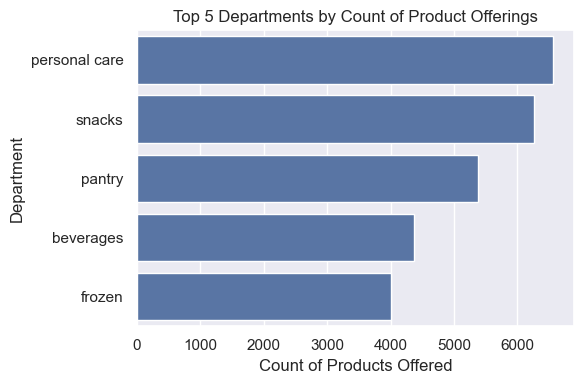

In [28]:
#Instacart Products Offered : Top 5 products
fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(y=count_top5_offered.index, x=count_top5_offered, ax=ax)
ax.set_xlabel('Count of Products Offered')
ax.set_ylabel('Department')
ax.set_title('Top 5 Departments by Count of Product Offerings')

plt.tight_layout()
plt.show()

#write figure to an SVG file        
fig.savefig('../visualizations/top5_offered_products.svg')

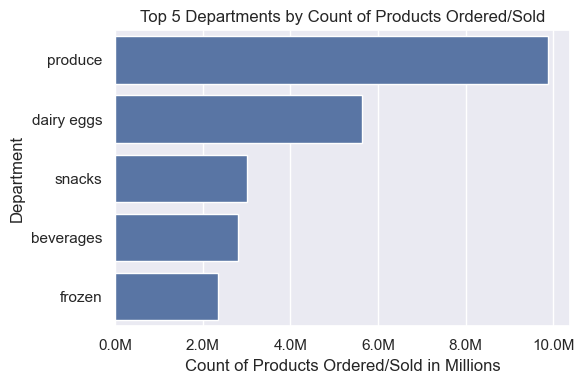

In [29]:
#Instacart Products Ordered / Sold : Top 5 products
fig, ax = plt.subplots(figsize=(6, 4))

#define the formatter function to scale the x axis to millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

sns.barplot(y=count_top5_ordered.index, x=count_top5_ordered, ax=ax)
ax.set_xlabel('Count of Products Ordered/Sold in Millions')
ax.set_ylabel('Department')
ax.set_title('Top 5 Departments by Count of Products Ordered/Sold')

#apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(millions))

plt.tight_layout()
plt.show()

#write figure to an SVG file
fig.savefig('../visualizations/top5_ordered_products.svg')     


It would appear that Instacart's sellers' department with the most product offerings is "personal care"  however, the sellers' department with the most orders placed by customers is "produce".  Personal care ranks 14th on the list of items ordered by Instacart customers.  This may be good information for the retailers that sell goods through Instacart to leverage in their decision-making.  Likewise, the same for Instacart.  How much money should then invest with certain retailers, in which ease of use is of high import to it's customers.  


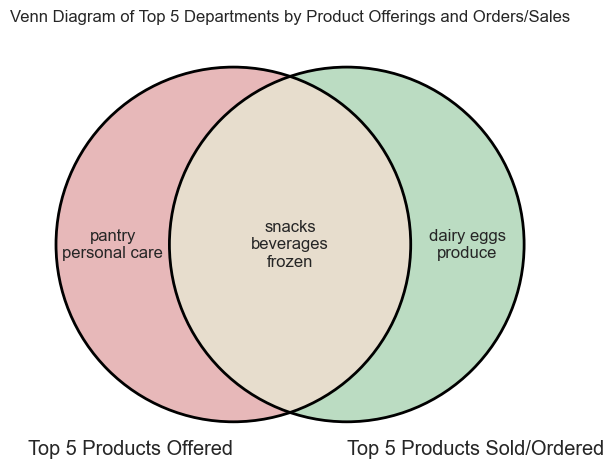

In [30]:
#create a venn diagram for the overlap between Top 5 product offerings and top 5 products ordered / sold
#create sets using the Top 5 products offered and the Top 5 product ordered / sold
top_5_departments_products = set(count.nlargest(5).index)
top_5_departments_orders = set(count_sold.nlargest(5).index)

#set igure size
plt.figure(figsize=(7,6))

#create the venn
venn = venn2([top_5_departments_products, top_5_departments_orders], ('Top 5 Products Offered', 'Top 5 Products Sold/Ordered'))

#add circles around the sets
venn2_circles([top_5_departments_products, top_5_departments_orders])

#add a title to the plot
plt.title('Venn Diagram of Top 5 Departments by Product Offerings and Orders/Sales')

# Annotate the sets with their items
venn.get_label_by_id('10').set_text('\n'.join(top_5_departments_products - top_5_departments_orders))
venn.get_label_by_id('01').set_text('\n'.join(top_5_departments_orders - top_5_departments_products))
venn.get_label_by_id('11').set_text('\n'.join(top_5_departments_products & top_5_departments_orders))

plt.show()




What are the most ordered items in the produce and dairy departments?

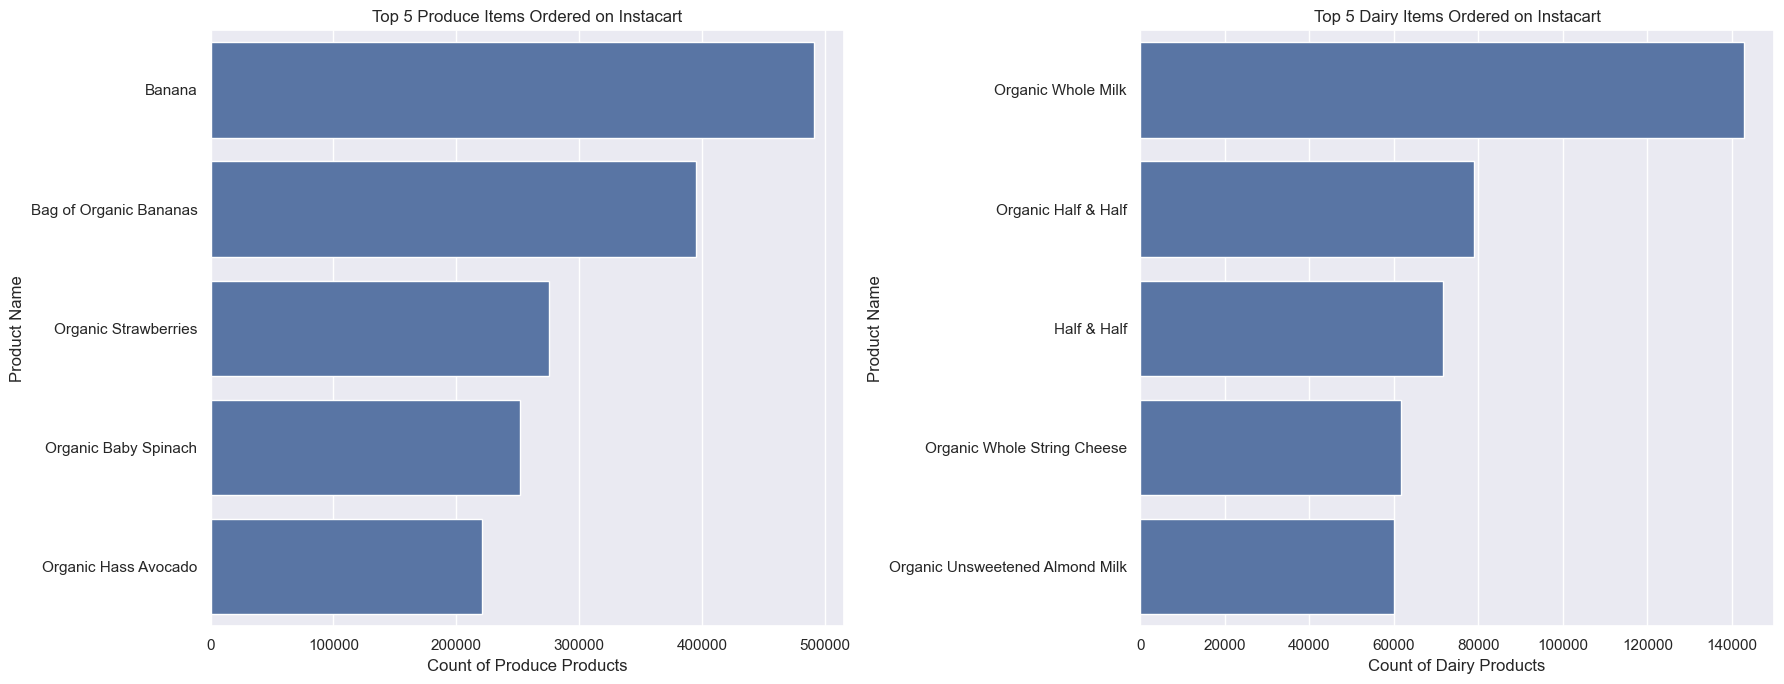

In [31]:
#Drill down to the most popular aisles and products within the produce and dairy departments
produce_orders_df = all_orders_all_dimensions_df[all_orders_all_dimensions_df['department']=='produce']

count_produce_orders_products = produce_orders_df['product_name'].value_counts().sort_values(ascending=False).head()
count_produce_orders_products

dairy_orders_df = all_orders_all_dimensions_df[all_orders_all_dimensions_df['department']=='dairy eggs']

count_dairy_orders_products = dairy_orders_df['product_name'].value_counts().sort_values(ascending=False).head()
count_dairy_orders_products



#Instacart Produce Items Ordered
fig, ax = plt.subplots(1,2, figsize=(18, 7))
#plot produce
sns.barplot(y=count_produce_orders_products.index, x=count_produce_orders_products, ax=ax[0])
ax[0].set_xlabel('Count of Produce Products')
ax[0].set_ylabel('Product Name')
ax[0].set_yticklabels(ax[0].get_yticklabels())
ax[0].set_title('Top 5 Produce Items Ordered on Instacart')

#plot dairy
sns.barplot(y=count_dairy_orders_products.index, x=count_dairy_orders_products, ax=ax[1])
ax[1].set_xlabel('Count of Dairy Products')
ax[1].set_ylabel('Product Name')
ax[1].set_yticklabels(ax[1].get_yticklabels())
ax[1].set_title('Top 5 Dairy Items Ordered on Instacart')

plt.tight_layout()
plt.show()

Within the produce department, the majority of the products ordered are of the Organic variety.  Could this also potentially drive purchase behavior.  There are a number of organic product offerings in the dairy department as well.

How many of the top overall products are in the produce category or are organic?

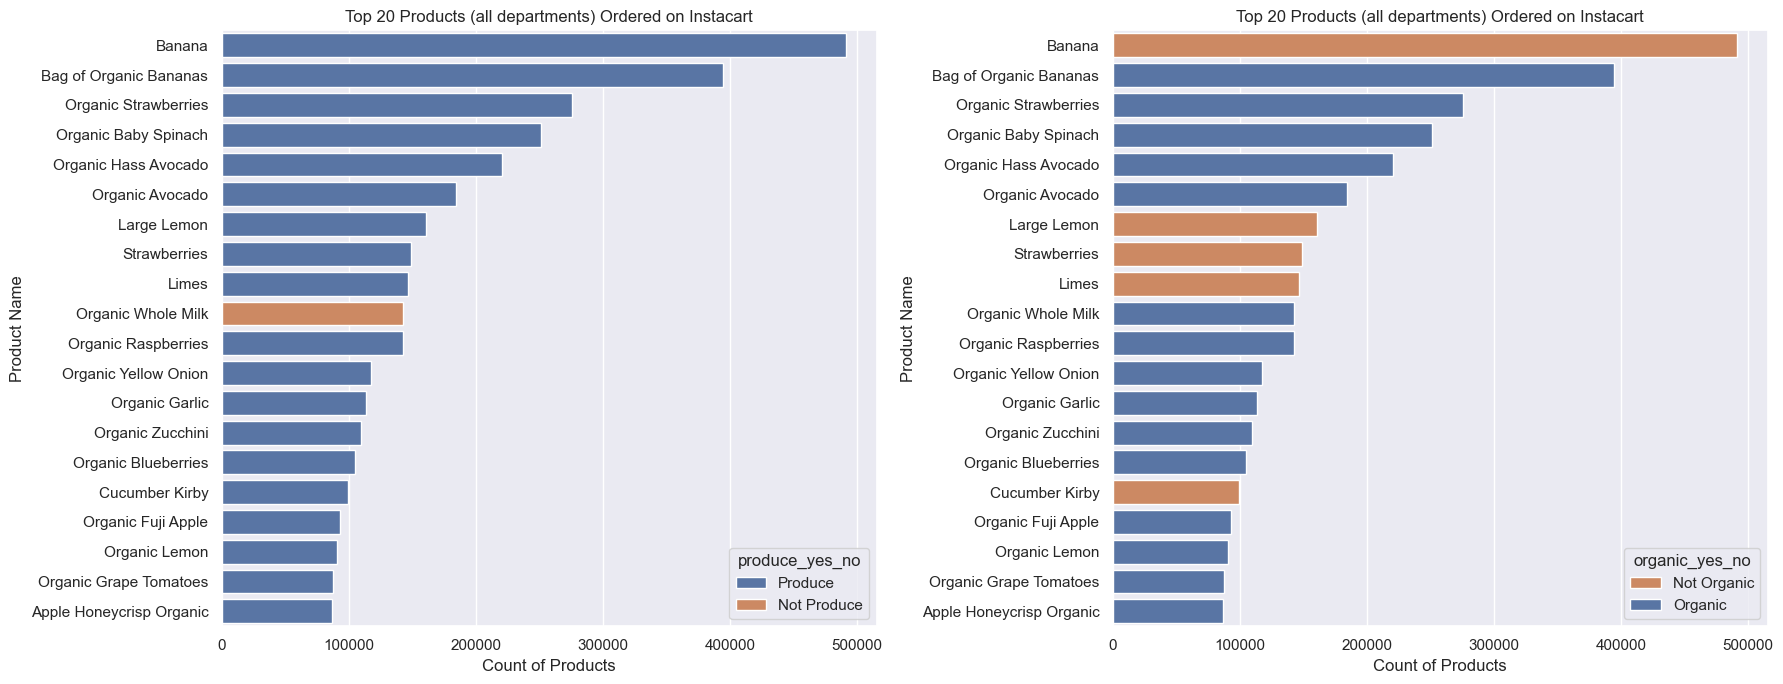

In [35]:
#add a produce or not column to my orders_all_dimensions table
all_orders_all_dimensions_df['produce_yes_no'] = all_orders_all_dimensions_df['department'].apply(lambda x: 'Produce' if x == 'produce' else 'Not Produce')

#add Organic or not organic column to my orders_all_dimensions table
all_orders_all_dimensions_df['organic_yes_no'] = all_orders_all_dimensions_df['product_name'].apply(lambda x: 'Organic' if 'Organic' in x  else 'Not Organic')


#groupby product name and produce designation
orders_all_products_counts_produce = all_orders_all_dimensions_df.groupby(['product_name', 'produce_yes_no']).size().reset_index(name='transaction_count')

#groupby product name and organic designation
orders_all_products_counts_organic = all_orders_all_dimensions_df.groupby(['product_name', 'organic_yes_no']).size().reset_index(name='transaction_count')


#groupby product name only
orders_all_products_counts = all_orders_all_dimensions_df.groupby('product_name').size().reset_index(name='transaction_count')


#sort and filter to top 20 produce products ordered
top_20_products_produce = orders_all_products_counts_produce.sort_values(by='transaction_count', ascending=False).head(20)

#sort and filter to top 20 organic products ordered
top_20_products_organic = orders_all_products_counts_organic.sort_values(by='transaction_count', ascending=False).head(20)

#sort and filter to top 20 of all products ordered  
top_20_products = orders_all_products_counts.sort_values(by='transaction_count', ascending=False).head(20)

#set color palette for Organic
s_palette = {'Not Organic': '#dd8452', 'Organic': '#4c72b0'}

#plot side by side top sales charts

fig, ax = plt.subplots(1,2 , figsize=(18, 7))

#plot top 20 grouped by produce
sns.barplot(data = top_20_products_produce, y='product_name', x='transaction_count', hue= 'produce_yes_no', ax=ax[0])
ax[0].set_xlabel('Count of Products')
ax[0].set_ylabel('Product Name')
ax[0].set_yticklabels(ax[0].get_yticklabels())
ax[0].set_title('Top 20 Products (all departments) Ordered on Instacart')

#plot top 20 grouped by organic
sns.barplot(data = top_20_products_organic, y='product_name', x='transaction_count', hue= 'organic_yes_no', palette=s_palette, ax=ax[1])
ax[1].set_xlabel('Count of Products')
ax[1].set_ylabel('Product Name')
ax[1].set_yticklabels(ax[1].get_yticklabels())
ax[1].set_title('Top 20 Products (all departments) Ordered on Instacart')

plt.tight_layout()
plt.show()

#write figure to an SVG file
fig.savefig('../visualizations/top20_products_ordered.svg')


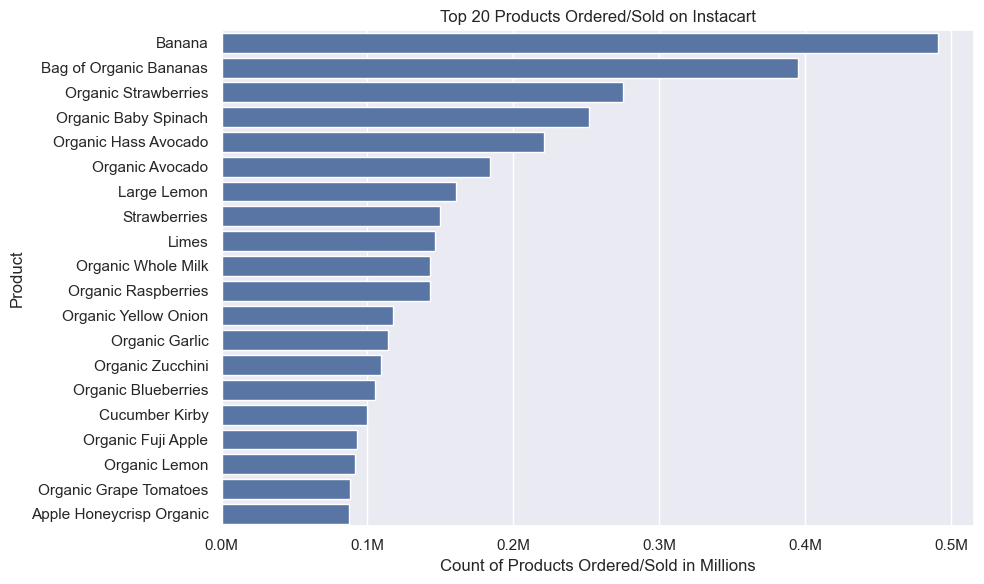

In [39]:
#Instacart Products Ordered / Sold : Top 20 products
fig, ax = plt.subplots(figsize=(10, 6))

#define the formatter function to scale the x axis to millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

sns.barplot(data = top_20_products, y='product_name', x='transaction_count', ax=ax)
ax.set_xlabel('Count of Products Ordered/Sold in Millions')
ax.set_ylabel('Product')
ax.set_title('Top 20 Products Ordered/Sold on Instacart')

#apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(millions))

plt.tight_layout()
plt.show()

#write figure to an SVG file
fig.savefig('../visualizations/top20_ordered_products.svg')     

How are the various features correlated to our target variable, "re-ordered"?

In [40]:
# create bins for "add_to_cart_order", "order number" and "days_since_prior_order"
# bins for add to cart order
bins_add_cart= [0,10,20,30,40,50,60,70,80, float('inf')]  # this is a representation of the size of the order, how many items were added to the cart
all_orders_all_dimensions_df['add_to_cart_groups'] = pd.cut(all_orders_all_dimensions_df['add_to_cart_order'], bins=bins_add_cart, labels=['1 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80', '> 80'], right=False)
# bins for order number
bins_order_number= [0,20,40,60,80, 100, float('inf')] # this represents the number of orders that a customer has placed
all_orders_all_dimensions_df['order_number_groups'] = pd.cut(all_orders_all_dimensions_df['order_number'], bins=bins_order_number, labels=['1 - 20', '21 - 40', '41 - 60', '61 - 80', '81 - 100', '> 100'], right=False)
# bins for days_since_prior_order
bins_days_since= [0,7,14,21,28, float('inf')] # this represents the recency of orders placed
all_orders_all_dimensions_df['days_since_prior_order_groups'] = pd.cut(all_orders_all_dimensions_df['days_since_prior_order'], bins=bins_days_since, labels=['1 - 7', '8 - 14', '15- 21', '22 - 28', '> 28'], right=False)

all_orders_all_dimensions_df.head(10)


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle,produce_yes_no,organic_yes_no,add_to_cart_groups,order_number_groups,days_since_prior_order_groups
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt,Not Produce,Not Organic,1 - 10,1 - 20,8 - 14
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,other creams cheeses,Not Produce,Organic,1 - 10,1 - 20,8 - 14
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce,fresh vegetables,Produce,Organic,1 - 10,1 - 20,8 - 14
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce,fresh vegetables,Produce,Not Organic,1 - 10,1 - 20,8 - 14
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,canned meat seafood,Not Produce,Not Organic,1 - 10,1 - 20,8 - 14
5,1,13176,6,0,112108,train,4,4,10,9.0,Bag of Organic Bananas,24,4,produce,fresh fruits,Produce,Organic,1 - 10,1 - 20,8 - 14
6,1,47209,7,0,112108,train,4,4,10,9.0,Organic Hass Avocado,24,4,produce,fresh fruits,Produce,Organic,1 - 10,1 - 20,8 - 14
7,1,22035,8,1,112108,train,4,4,10,9.0,Organic Whole String Cheese,21,16,dairy eggs,packaged cheese,Not Produce,Organic,1 - 10,1 - 20,8 - 14
8,36,39612,1,0,79431,train,23,6,18,30.0,Grated Pecorino Romano Cheese,2,16,dairy eggs,specialty cheeses,Not Produce,Not Organic,1 - 10,21 - 40,> 28
9,36,19660,2,1,79431,train,23,6,18,30.0,Spring Water,115,7,beverages,water seltzer sparkling water,Not Produce,Not Organic,1 - 10,21 - 40,> 28


In [41]:
#change re-ordered to object to match other categorical features
all_orders_all_dimensions_df['reordered_cat'] = all_orders_all_dimensions_df['reordered'].map({0: 'No', 1:'Yes'}).astype('object')

# create columns to plot list
plot_columns = all_orders_all_dimensions_df[['department', 'produce_yes_no', 'organic_yes_no', 'add_to_cart_groups', 'order_number_groups', 'days_since_prior_order_groups']].columns.tolist()


print(plot_columns)

['department', 'produce_yes_no', 'organic_yes_no', 'add_to_cart_groups', 'order_number_groups', 'days_since_prior_order_groups']


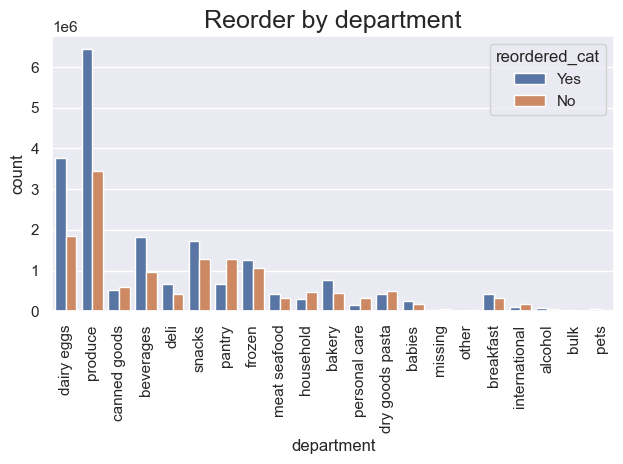

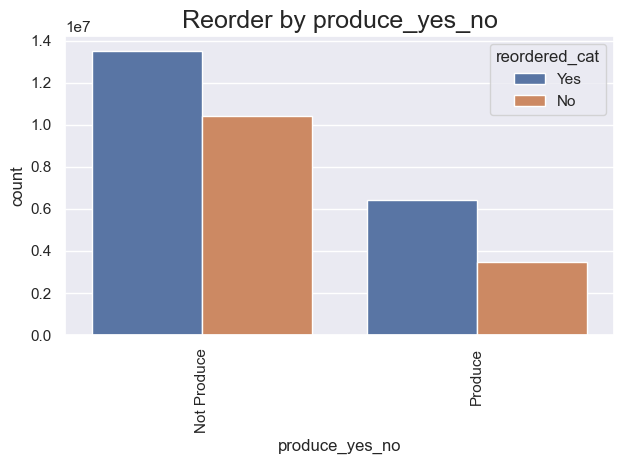

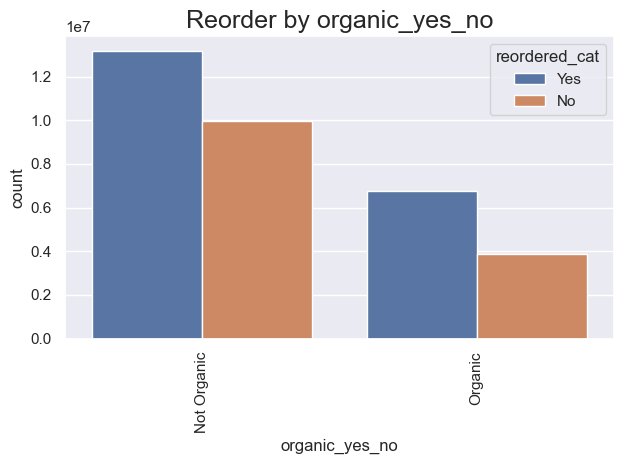

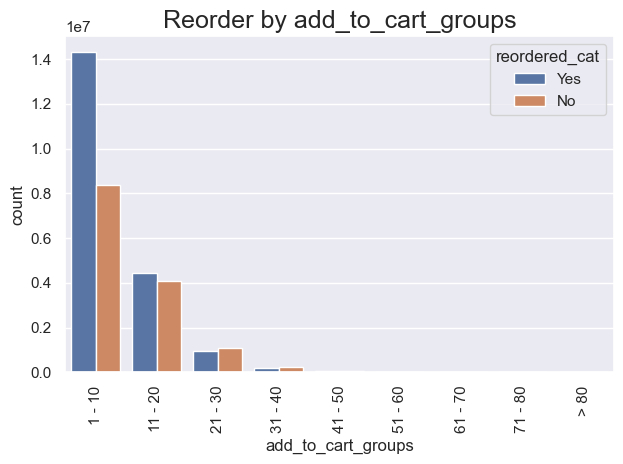

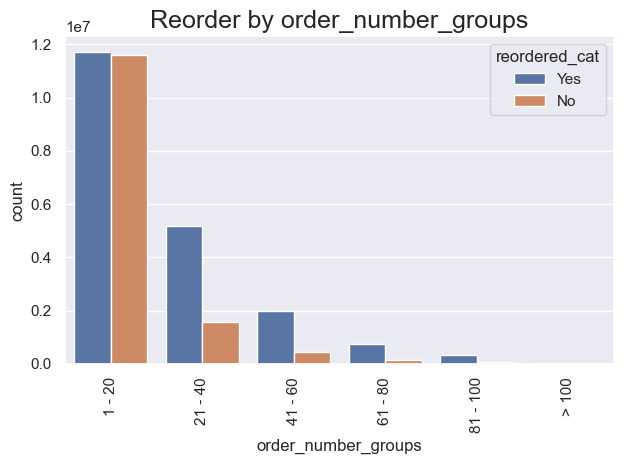

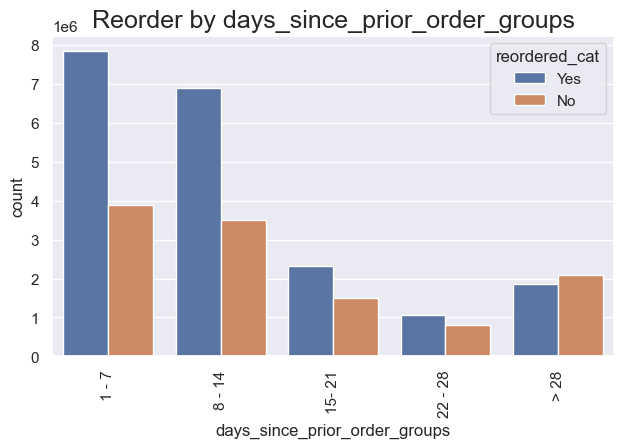

In [42]:
# As 'reorder' is the main variable under review, it would be best to plot all of the other categorical variables by reorder vs no reorder to see if that provides any insights
for i, cat_variable in enumerate(plot_columns):
    plt.figure(i)
    sns.countplot(data=all_orders_all_dimensions_df, x=cat_variable, hue='reordered_cat')
    plt.title(f'Reorder by {cat_variable}', fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()

In [43]:
# create columns to plot list for pie charts
plot_columns_pie = all_orders_all_dimensions_df[['produce_yes_no', 'organic_yes_no']].columns.tolist()

<Figure size 1000x600 with 0 Axes>

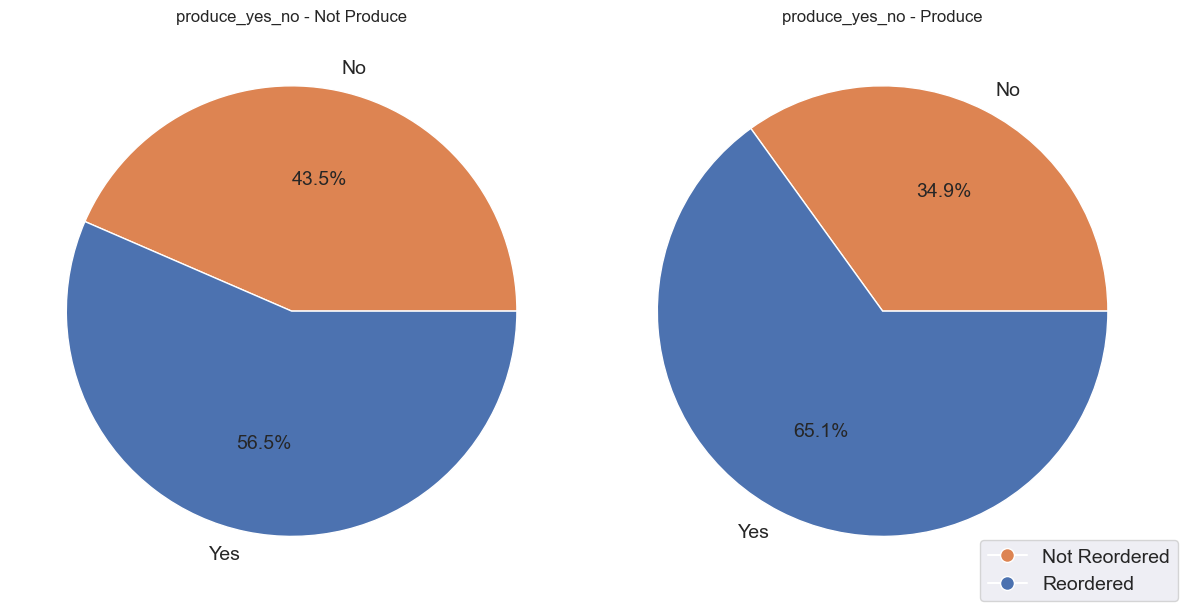

<Figure size 1000x600 with 0 Axes>

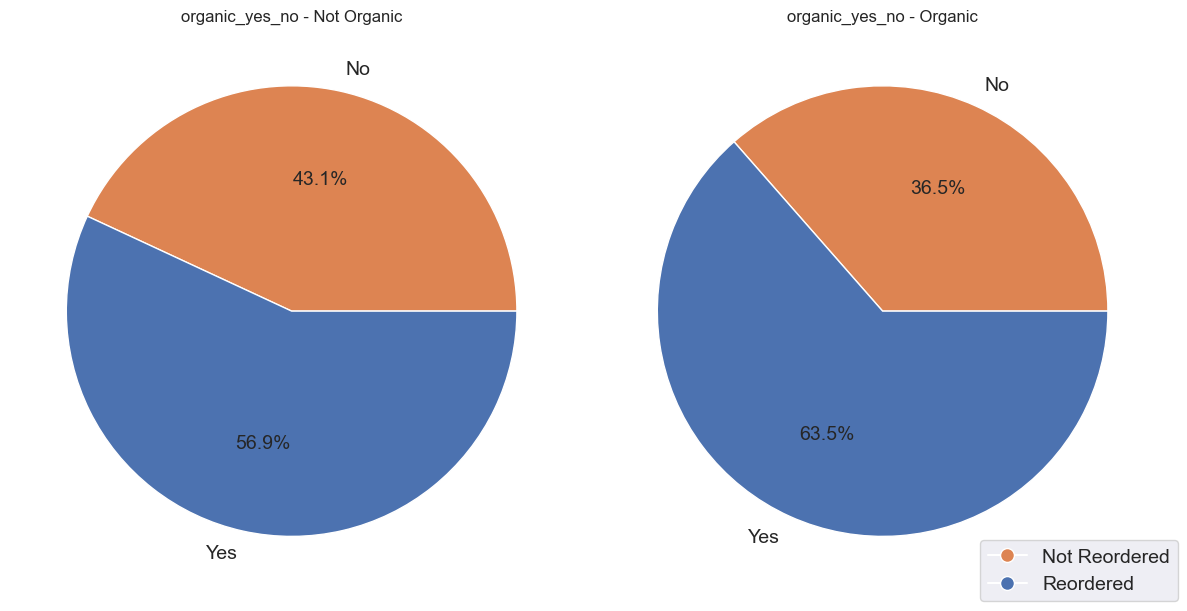

In [44]:
#same charts with proportions vs total counts
for i, cat_variable in enumerate(plot_columns_pie):
    plt.figure(figsize=(10,6))
    # Calculate proportions
    prop_df = all_orders_all_dimensions_df.groupby([cat_variable, 'reordered_cat']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
    #plot pie charts for each category  
    fig, axes = plt.subplots(1, len(prop_df), figsize=(12, 6))   
  
    
    for (ax, (cat, row)) in zip(axes, prop_df.iterrows()): 
        row.plot(kind='pie', ax=ax, colors=['#dd8452','#4c72b0'], fontsize=14, autopct='%1.1f%%') 
        ax.set_ylabel('')
        ax.set_title(f'{cat_variable} - {cat}')
        
    #Create a custom legend 
    labels = ['Not Reordered', 'Reordered'] 
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#dd8452', markersize=10), plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#4c72b0', markersize=10)] 
    fig.legend(handles, labels, loc='lower right', fontsize=14)
    
    # Save the figure as an SVG file
    plt.savefig(f'../visualizations/{cat_variable}_proportions_pie_chart.svg', format='svg')

    plt.tight_layout()


In [45]:
#convert all the categorical variables into numeric values using pd.get_dummies method.  Given the size of the product and aisle features, I will drop those columns before moving forward.
#also as the dataset was quite large, I'm only using the smaller train set here.
#filter all_orders_all_dimensions_df to only contain rows where eval_set is train
skinny_orders_df = all_orders_all_dimensions_df[all_orders_all_dimensions_df['eval_set']=='train']

skinny_orders_df = skinny_orders_df.drop(columns=['aisle', 'product_name', 'aisle_id', 'product_id', 'user_id', 'department_id', 'eval_set'])
#all_orders_all_dimensions_df
#orders_all_dimensions_train_df

orders_converted = pd.get_dummies(skinny_orders_df, dtype=int)
orders_converted.head()


,order_id,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_alcohol,department_babies,department_bakery,...,order_number_groups_61 - 80,order_number_groups_81 - 100,order_number_groups_> 100,days_since_prior_order_groups_1 - 7,days_since_prior_order_groups_8 - 14,days_since_prior_order_groups_15- 21,days_since_prior_order_groups_22 - 28,days_since_prior_order_groups_> 28,reordered_cat_No,reordered_cat_Yes
0,1,1,1,4,4,10,9.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,2,1,4,4,10,9.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,3,0,4,4,10,9.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,4,0,4,4,10,9.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,5,1,4,4,10,9.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [46]:
#review correlation of the various variables 
orders_converted.corr()

,order_id,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_alcohol,department_babies,department_bakery,...,order_number_groups_61 - 80,order_number_groups_81 - 100,order_number_groups_> 100,days_since_prior_order_groups_1 - 7,days_since_prior_order_groups_8 - 14,days_since_prior_order_groups_15- 21,days_since_prior_order_groups_22 - 28,days_since_prior_order_groups_> 28,reordered_cat_No,reordered_cat_Yes
order_id,1.000000,0.001916,0.001418,0.001522,0.001090,-0.004422,0.002708,-0.001330,-0.001983,0.001177,...,0.000736,-0.000384,0.003664,-0.004040,-0.001869,0.004159,0.002437,0.000613,-0.001418,0.001418
add_to_cart_order,0.001916,1.000000,-0.146393,0.014332,-0.019353,-0.008905,0.017283,-0.026716,0.033604,-0.005546,...,0.002442,-0.010336,-0.016224,-0.045799,0.023005,0.020471,0.013150,-0.005675,0.146393,-0.146393
reordered,0.001418,-0.146393,1.000000,0.223947,-0.006714,-0.017840,-0.160152,0.001070,-0.012259,0.013828,...,0.067400,0.043496,0.039668,0.074061,0.083502,0.022610,-0.001107,-0.157196,-1.000000,1.000000
order_number,0.001522,0.014332,0.223947,1.000000,0.024500,-0.026567,-0.403861,-0.007137,0.017599,0.001090,...,0.439863,0.364124,0.371322,0.346825,0.099914,-0.060270,-0.073653,-0.299185,-0.223947,0.223947
order_dow,0.001090,-0.019353,-0.006714,0.024500,1.000000,0.005910,-0.026765,0.015493,-0.001746,0.001222,...,0.017046,0.012251,0.000430,0.052545,-0.012476,-0.008254,-0.004801,-0.024053,0.006714,-0.006714
order_hour_of_day,-0.004422,-0.008905,-0.017840,-0.026567,0.005910,1.000000,0.005184,0.002405,-0.001931,-0.001511,...,-0.006329,-0.004718,-0.011126,0.025923,-0.026103,-0.008274,0.000119,0.008378,0.017840,-0.017840
days_since_prior_order,0.002708,0.017283,-0.160152,-0.403861,-0.026765,0.005184,1.000000,-0.002682,-0.013327,0.001021,...,-0.155790,-0.102607,-0.100348,-0.623441,-0.439147,-0.024958,0.191587,0.843525,0.160152,-0.160152
department_alcohol,-0.001330,-0.026716,0.001070,-0.007137,0.015493,0.002405,-0.002682,1.000000,-0.006654,-0.012125,...,-0.001229,0.002619,-0.000434,0.008043,-0.005526,-0.002681,0.000368,0.000082,-0.001070,0.001070
department_babies,-0.001983,0.033604,-0.012259,0.017599,-0.001746,-0.001931,-0.013327,-0.006654,1.000000,-0.019876,...,0.008257,0.006756,0.000353,0.013140,0.003486,-0.002638,-0.007458,-0.007966,0.012259,-0.012259
department_bakery,0.001177,-0.005546,0.013828,0.001090,0.001222,-0.001511,0.001021,-0.012125,-0.019876,1.000000,...,0.001786,-0.000098,0.001144,-0.000839,-0.000231,0.000232,-0.000054,0.000789,-0.013828,0.013828


In [47]:
orders_converted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1384617 entries, 0 to 1384616
Data columns (total 54 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   order_id                               1384617 non-null  int64  
 1   add_to_cart_order                      1384617 non-null  int64  
 2   reordered                              1384617 non-null  int64  
 3   order_number                           1384617 non-null  int64  
 4   order_dow                              1384617 non-null  int64  
 5   order_hour_of_day                      1384617 non-null  int64  
 6   days_since_prior_order                 1384617 non-null  float64
 7   department_alcohol                     1384617 non-null  int32  
 8   department_babies                      1384617 non-null  int32  
 9   department_bakery                      1384617 non-null  int32  
 10  department_beverages                   1384617 

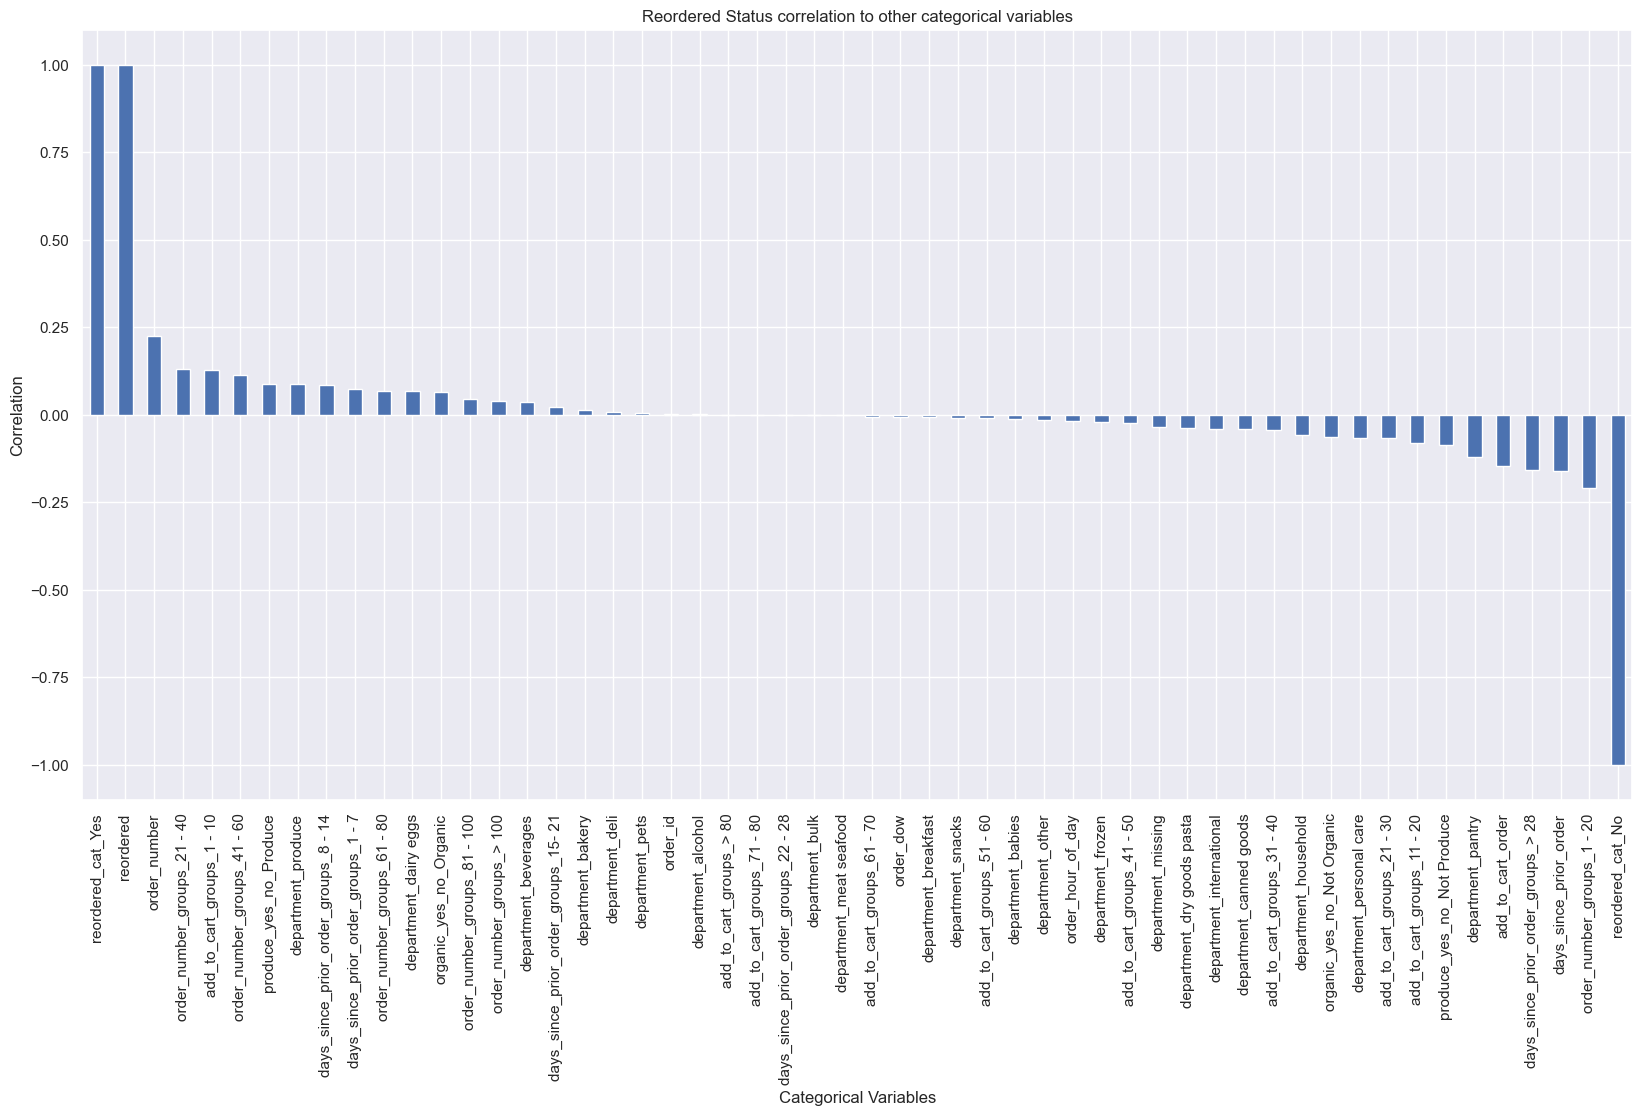

In [48]:
# it's difficult to review the correlation in table form. Will convert to a graphical version comparing only "reordered" status to all other categories
plt.figure(figsize=(20,10))
orders_converted.corr()['reordered'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Correlation')
plt.xlabel('Categorical Variables')
plt.title('Reordered Status correlation to other categorical variables')
plt.show()

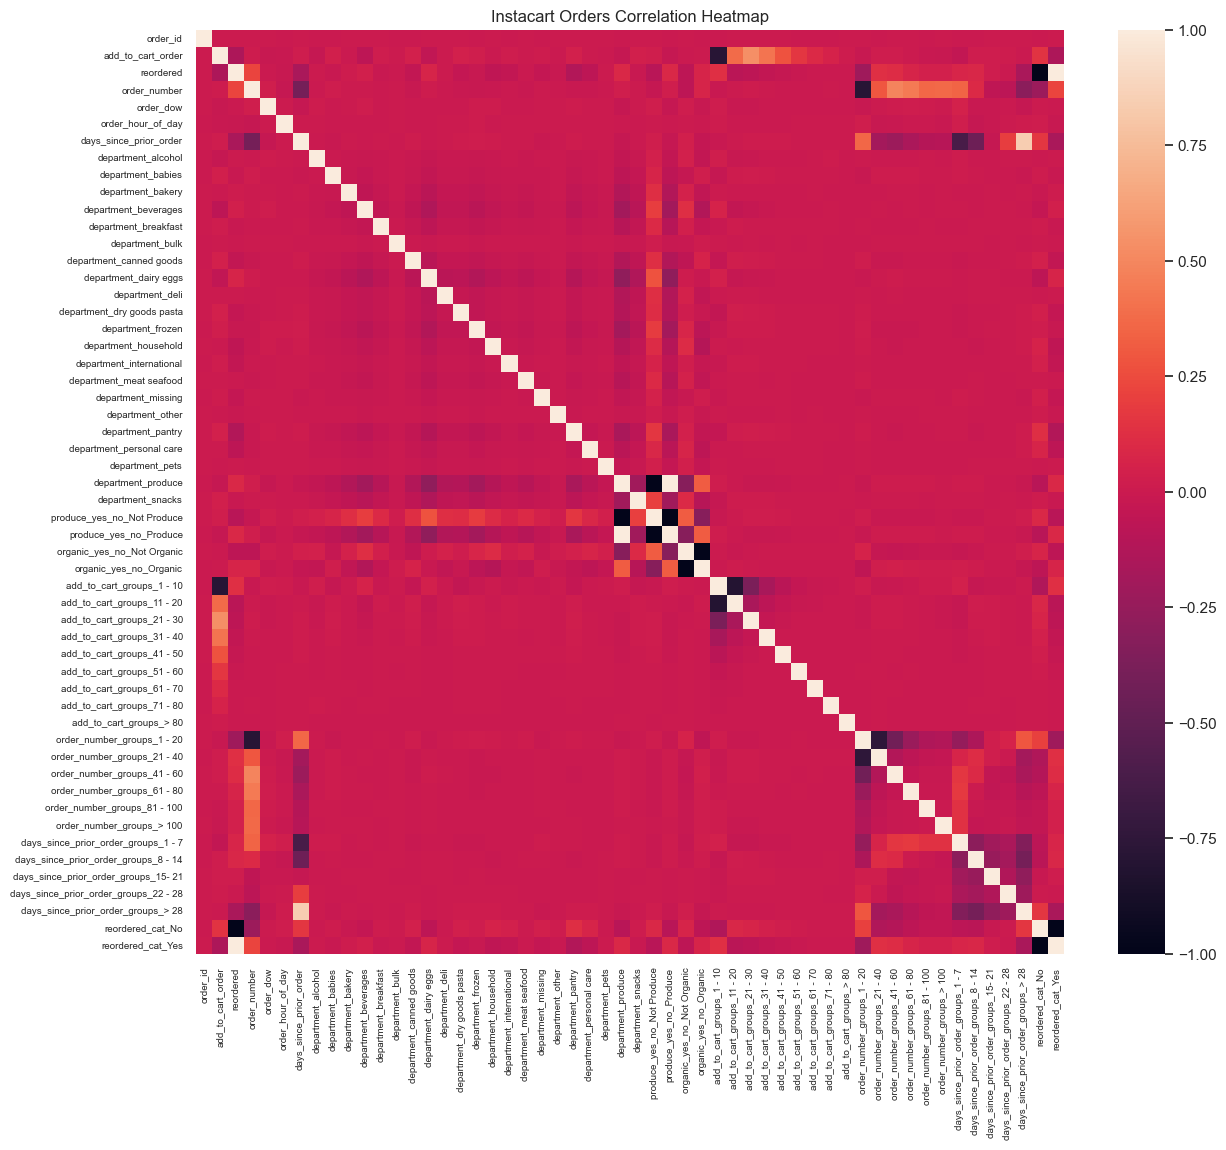

In [49]:
#filter the data to study how each department correlates to re-ordering
corr_matrix = orders_converted.corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix)
plt.title('Instacart Orders Correlation Heatmap')
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.show()


### Initial Dataset Insights ###


Produce is the best selling department on Instacart, leading the way in number of orders placed.  Rounding out the top 5 departments for orders placed, we have dairy/eggs, snacks, beverages, and frozen goods.

Within the produce category, the best seller is Bananas.  I also noted that of the Top 20 products, all were produce items, except 1 dairy item (Organic Whole Milk).  What also stood out for the produce items, most of them were of the organic variety.  

The departments with the highest reorder percentages include: dairy/eggs ~ 68%, produce ~67%, beverages ~65%, bakery, pets and deli.  All other departments had reorder percentages less than 60%.

I also noted that there were weak positive correlations between "reordered" status and:
* customers that have placed between 21 and 40 orders
* products that are added to the cart within the first 10 spots in the shopping cart
* days since prior order between 8 and 14 days is also mildly correlated to reordered status

Not surprising, customers who have placed more orders are more likely to reorder goods.  